Name : Layanika Vinay Saravanan
Student ID : 8934459

**1.Introduction & Goal of this report:**

**Objective**: The goal of this report is to train and evaluate three univariate linear regression models to predict the median house value based on three different independent variables: median income, population, and number of households. This will help in understanding the relationship between these variables and the median house value.

**Dataset**: The dataset contains information about housing in California, including median income, population, number of households, and median house value.


**2.Getting the data and loading it into the pandas**

In [33]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs

# Load the dataset
data = pd.read_csv(r"C:\Users\Layanika.V.S\Desktop\Fall24\FML24\Lab-1-CSCN8010\housing.csv")  

# Display the first few rows of the dataset
print(data.head(5))  # Print the first 5 rows of the DataFrame to get an overview of the data


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


**3.Exploratory Data Analysis - EDA**

Step - 1 : Exploring Statistics:

In [3]:
# Display basic statistics to describe the data set
print(data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

Step - 2 : Create three Seaborn scatter plots of median house value vs. median income, population and number of households.

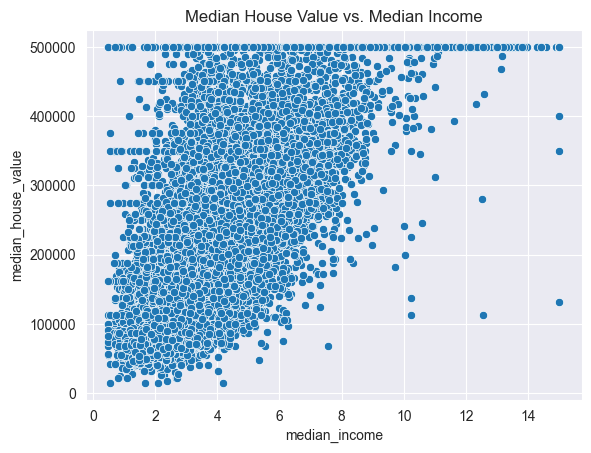

This plot shows the relationship between median income and median house value.


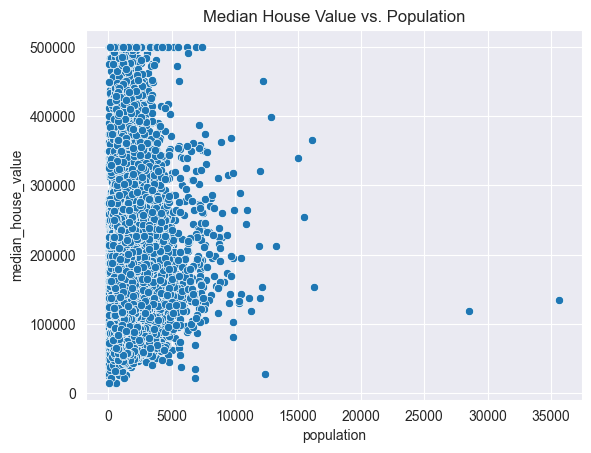

This plot shows the relationship between population and median house value.


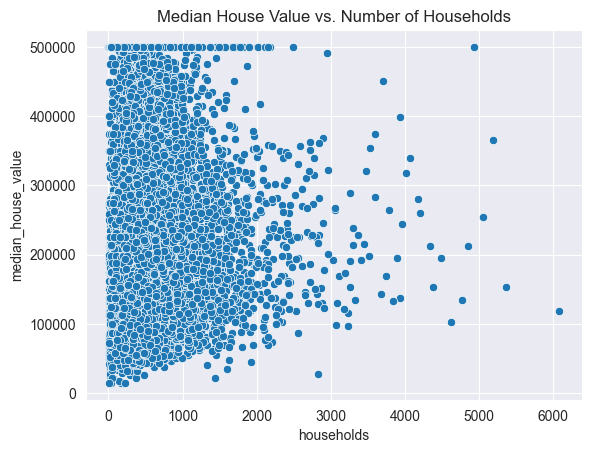

This plot shows the relationship between the number of households and median house value.


In [34]:
# Scatter plot for median house value vs. median income
sns.scatterplot(x='median_income', y='median_house_value', data=data)  # Create a scatter plot with median income on the x-axis and median house value on the y-axis
plt.title('Median House Value vs. Median Income')  # Set the title of the plot
plt.show()  # Display the plot
print("This plot shows the relationship between median income and median house value.")  # Explanation

# Scatter plot for median house value vs. population
sns.scatterplot(x='population', y='median_house_value', data=data)  # Create a scatter plot with population on the x-axis and median house value on the y-axis
plt.title('Median House Value vs. Population')  # Set the title of the plot
plt.show()  # Display the plot
print("This plot shows the relationship between population and median house value.")  # Explanation

# Scatter plot for median house value vs. number of households
sns.scatterplot(x='households', y='median_house_value', data=data)  # Create a scatter plot with number of households on the x-axis and median house value on the y-axis
plt.title('Median House Value vs. Number of Households')  # Set the title of the plot
plt.show()  # Display the plot
print("This plot shows the relationship between the number of households and median house value.")  # Explanation

Step - 3 : Based on the above, describe the 4 variables used in this lab. Observations such as their meaning, range and additional characteristics that you notice.

In [36]:
# Define the independent variables
# The independent variables are the features used to predict the dependent variable
X_median_income = data[['median_income']]  # Selecting median income as an independent variable
X_population = data[['population']]  # Selecting population as an independent variable
X_households = data[['households']]  # Selecting number of households as an independent variable

# Define the dependent variable
# The dependent variable is the target variable that we want to predict, which is the median house value
y = data['median_house_value']  # Selecting median house value as the dependent variable

**4. Running the three linear regressions**

Step -1 : Data Oreoaration - Splitting the data set into training and testing data.

In [37]:
from sklearn.model_selection import train_test_split

# Select features and target
# X contains the features: median_income, total_rooms, and housing_median_age
# y contains the target variable: median_house_value
X = data[['median_income', 'total_rooms', 'housing_median_age']]
y = data['median_house_value']

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing, and 80% for training
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step -2 :Running the linear regression.

In [38]:
#importing the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Function to run regression and return metrics
def run_regression(x, y):
    # Initialize the Linear Regression model
    model = LinearRegression()
    # Fit the model to the data
    model.fit(x, y)
    # Predict the target variable
    y_pred = model.predict(x)
    # Calculate Mean Squared Error
    mse = mean_squared_error(y, y_pred)
    # Calculate Mean Absolute Error
    mae = mean_absolute_error(y, y_pred)
    # Calculate R-squared score
    r2 = r2_score(y, y_pred)
    # Return the intercept, coefficients, and metrics
    return model.intercept_, model.coef_, mse, mae, r2

# Median house value vs. median income
# Run regression and get metrics for median house value vs. median income
intercept_income, coef_income, mse_income, mae_income, r2_income = run_regression(data[['median_income']], data['median_house_value'])

# Median house value vs. population
# Run regression and get metrics for median house value vs. population
intercept_population, coef_population, mse_population, mae_population, r2_population = run_regression(data[['population']], data['median_house_value'])

# Median house value vs. number of households
# Run regression and get metrics for median house value vs. number of households
intercept_households, coef_households, mse_households, mae_households, r2_households = run_regression(data[['households']], data['median_house_value'])

**5. In a single table for all three linear regressions, provide per regression model their Intercept, Slope, MSE - Mean Squared Error and MAE - Mean Average Error**

In [24]:
# Summarize the results
summary = pd.DataFrame({
    'Model': ['Income', 'Population', 'Households'],
    'Intercept': [intercept_income, intercept_population, intercept_households],
    'Slope': [coef_income[0], coef_population[0], coef_households[0]],
    'MSE': [mse_income, mse_population, mse_households],
    'MAE': [mae_income, mae_population, mae_households]
})
print(summary)

        Model      Intercept         Slope           MSE           MAE
0      Income   45085.576703  41793.849202  7.011312e+09  62625.933791
1  Population  210436.262076     -2.511753  1.330741e+10  91153.820095
2  Households  196928.577162     19.872775  1.325778e+10  90802.743243


**6. Plotting the resulting line on the scatter data.**

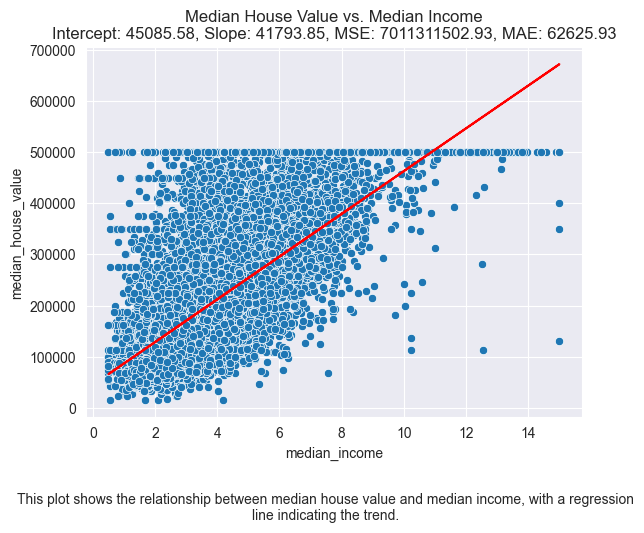

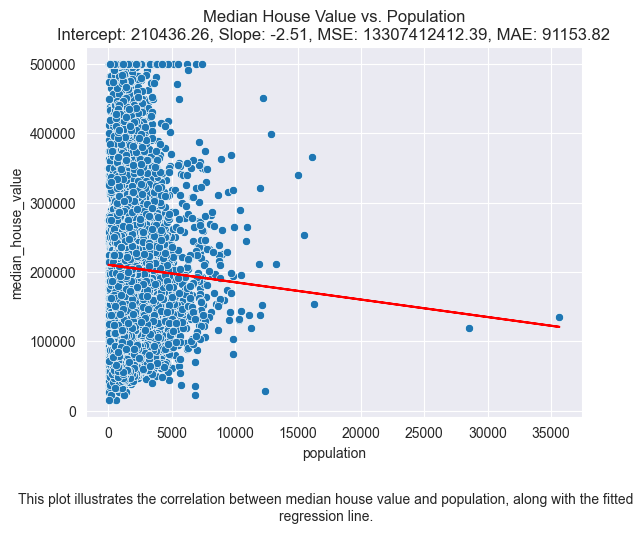

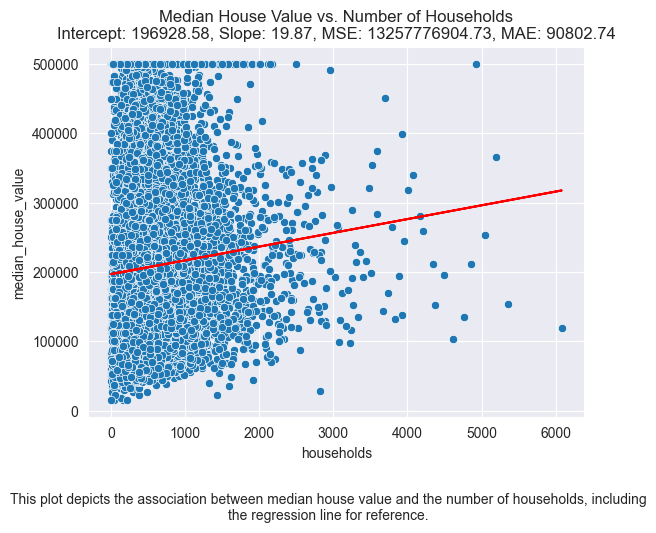

In [40]:
# Plot for median house value vs. median income
sns.scatterplot(x='median_income', y='median_house_value', data=data)
# Plot the regression line
plt.plot(data['median_income'], coef_income[0] * data['median_income'] + intercept_income, color='red')
# Add title with regression metrics
plt.title(f'Median House Value vs. Median Income\nIntercept: {intercept_income:.2f}, Slope: {coef_income[0]:.2f}, MSE: {mse_income:.2f}, MAE: {mae_income:.2f}')
plt.figtext(0.5, -0.1, 'This plot shows the relationship between median house value and median income, with a regression line indicating the trend.', wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

# Plot for median house value vs. population
sns.scatterplot(x='population', y='median_house_value', data=data)
# Plot the regression line
plt.plot(data['population'], coef_population[0] * data['population'] + intercept_population, color='red')
# Add title with regression metrics
plt.title(f'Median House Value vs. Population\nIntercept: {intercept_population:.2f}, Slope: {coef_population[0]:.2f}, MSE: {mse_population:.2f}, MAE: {mae_population:.2f}')
plt.figtext(0.5, -0.1, 'This plot illustrates the correlation between median house value and population, along with the fitted regression line.', wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

# Plot for median house value vs. number of households
sns.scatterplot(x='households', y='median_house_value', data=data)
# Plot the regression line
plt.plot(data['households'], coef_households[0] * data['households'] + intercept_households, color='red')
# Add title with regression metrics
plt.title(f'Median House Value vs. Number of Households\nIntercept: {intercept_households:.2f}, Slope: {coef_households[0]:.2f}, MSE: {mse_households:.2f}, MAE: {mae_households:.2f}')
plt.figtext(0.5, -0.1, 'This plot depicts the association between median house value and the number of households, including the regression line for reference.', wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

**7. Summary :**

A . Conclusion:

1. The model using 'Median Income' as the feature has the best goodness-of-fit with the highest R-squared value and the lowest MSE and MAE. This indicates that 'Median Income' is a strong predictor of 'Median House Value'.
2. The model using 'Population' as the feature has the lowest goodness-of-fit with the lowest R-squared value and the highest MSE and MAE, suggesting a weaker relationship.
3. The model using 'Households' as the feature falls in between, showing a moderate relationship with 'Median House Value'.

Out of the four simple regression models where median income is used as a predictor for median house value, the regression model above yielded the best fit. Population and number of households were slightly less efficient in terms of prediction. The income median is the largest of the three variables. It was also suggested that parameters could be refined to provide a better fit.

B. Compare the models in terms of their goodness-of-fit

In [30]:
# Compile the metrics into a DataFrame
metrics = {
    'Model': ['Median Income', 'Population', 'Households'],
    'Intercept': [intercept_income, intercept_population, intercept_households],
    'Coefficient': [coef_income, coef_population, coef_households],
    'MSE': [mse_income, mse_population, mse_households],
    'MAE': [mae_income, mae_population, mae_households],
    'R-squared': [r2_income, r2_population, r2_households]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

           Model      Intercept           Coefficient           MSE  \
0  Median Income   45085.576703  [41793.849201896286]  7.011312e+09   
1     Population  210436.262076  [-2.511752774615085]  1.330741e+10   
2     Households  196928.577162  [19.872775155643875]  1.325778e+10   

            MAE  R-squared  
0  62625.933791   0.473447  
1  91153.820095   0.000608  
2  90802.743243   0.004335  


C. Additional Insights:

Median Income: Typically, this feature has a strong positive correlation with house prices, often resulting in lower MSE and MAE.
Population: This feature might show a weaker correlation with house prices, potentially resulting in higher MSE and MAE.
Households: This feature can also be a good predictor but might not be as strong as median income.